In [1]:
import torch
import torch.nn.functional as F

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p1 = torch.Tensor([0.25, 0.75])
p2 = torch.Tensor([0.1, 0.9])
p3 = torch.Tensor([0.4, 0.6])

# 1. Nos centramos en $p_1$

tensor([232., 768.])


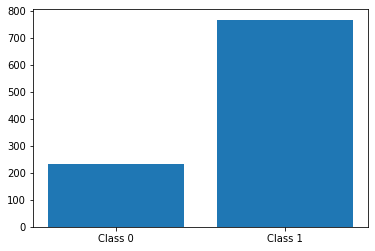

In [10]:
N = 10**3

v = F.gumbel_softmax(logits=p1.log(), hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p1.log(), hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([247., 753.])


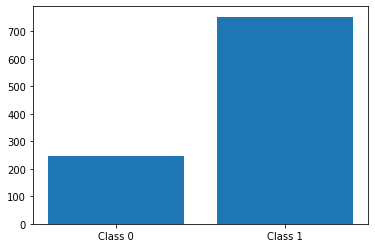

In [17]:
N = 10**3

v = F.gumbel_softmax(logits=p1.log(), tau=2, hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p1.log(), tau=2, hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

No funciona el parámetro $\tau$. No tiene ningún efecto en nuestros resultados.

# Nos centramos en $p_2$

tensor([104., 896.])


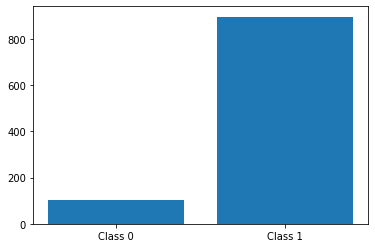

In [18]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([499.9456, 500.0544])


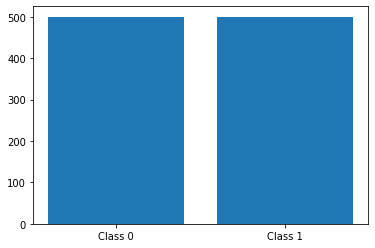

In [21]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), tau=10**4, hard=False)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), tau=10**4, hard=False)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([ 84.3102, 915.6899])


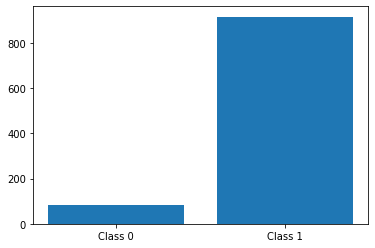

In [23]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), tau=0.1, hard=False)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), tau=0.1, hard=False)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

Cuando el modo está en $\texttt{hard}=True$, entonces las probabilidades si que las ajusta de puta madre.

# 3. Probamos probabilidades multiclase!

In [30]:
p = torch.Tensor([0.1, 0.3, 0.6])

tensor([ 95., 296., 609.])


<BarContainer object of 3 artists>

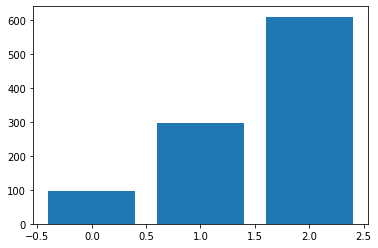

In [27]:
v = F.gumbel_softmax(logits=p.log(), hard=True)

for i in range (1, N):
    v += F.gumbel_softmax(logits=p.log(), hard=True)

print(v)

plt.bar(np.arange(3), v)

tensor([0.3328, 0.3342, 0.3330])


<BarContainer object of 3 artists>

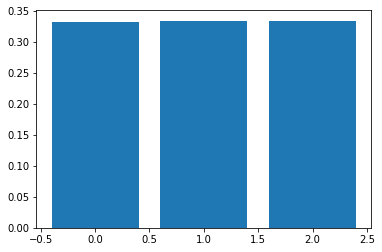

In [32]:
v = F.gumbel_softmax(logits=p.log(), hard=False, tau=1000)

print(v)

plt.bar(np.arange(3), v)

tensor([146.5920, 341.0971, 512.3111])


<BarContainer object of 3 artists>

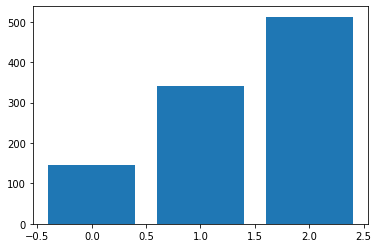

In [39]:
v = F.gumbel_softmax(logits=p.log(), hard=False)

for i in range (1, N):
    v += F.gumbel_softmax(logits=p.log(), hard=False)

print(v)

plt.bar(np.arange(3), v)

tensor([10.5834, 26.3706, 63.0460])


<BarContainer object of 3 artists>

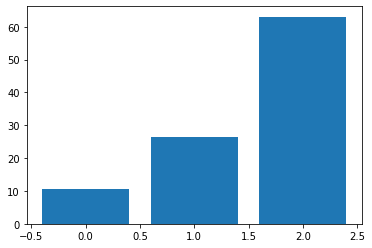

In [44]:
v = F.gumbel_softmax(logits=p.log(), hard=False, tau=0.1)

for i in range (1, 100):
    v += F.gumbel_softmax(logits=p.log(), hard=False, tau=0.1)

print(v)

plt.bar(np.arange(3), v)

# 4. Nos centramos en $\texttt{hard}=False$

In [10]:
n = 10**3
tau = 0.5
v1 = F.gumbel_softmax(logits=p1.log(), tau=tau)
v2 = F.gumbel_softmax(logits=p2.log(), tau=tau)
v3 = F.gumbel_softmax(logits=p3.log(), tau=tau)

for seed in range(1, n):

    v1 += F.gumbel_softmax(logits=p1.log(), tau=tau)
    v2 += F.gumbel_softmax(logits=p2.log(), tau=tau)
    v3 += F.gumbel_softmax(logits=p3.log(), tau=tau)
v1 = v1/n
v2 = v2/n
v3 = v3/n

print(v1, v2, v3)

tensor([0.2636, 0.7364]) tensor([0.1230, 0.8770]) tensor([0.4112, 0.5888])
